In [1]:
# prompt: create a machine learning model that takes an existing dataset of songs with various characteristics and suggests songs for user based on a song request

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Load the dataset (replace 'songs.csv' with your actual file)
file_path = Path('Resources/spotify_dataset.csv')
songs_df = pd.read_csv(file_path)

In [3]:
print(songs_df['decade'].unique())

['60s' '70s' '80s' '90s' '00s' '10s']


In [7]:
# # Preprocessing: Handle missing values and convert categorical features (if needed)
# # Example: Fill missing values in 'danceability' with the mean
# # songs_df['danceability'].fillna(songs_df['danceability'].mean(), inplace=True)

# Select relevant features for the model
features = ['danceability', 'energy', 'key','loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature', 'chorus_hit','sections','popularity','decade']
X = songs_df[features]


In [5]:
songs_df['decade'] = songs_df['decade'].replace({
    '60s': 1960.0,
    '70s': 1970.0,
    '80s': 1980.0,
    '90s': 1990.0,
    '00s': 2000.0,
    '10s': 2010.0
}).astype(float)


C:\Users\mahen\AppData\Local\Temp\ipykernel_7652\1170423214.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  songs_df['decade'] = songs_df['decade'].replace({


In [8]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data (not strictly needed for KNN, but good practice)
X_train, X_test, _, _ = train_test_split(X_scaled, songs_df['track'], test_size=0.2, random_state=42)

In [9]:
# Train a k-Nearest Neighbors model
model = NearestNeighbors(n_neighbors=10, algorithm='auto') # Adjust n_neighbors as needed
model.fit(X_train)

NearestNeighbors(n_neighbors=10)

In [10]:
def recommend_songs(song_id, num_recommendations=5):
    try:
        # Find the index of the requested song
        song_index = songs_df[songs_df['track'] == song_id].index[0]

        # Get the features for the requested song
        song_features = X_scaled[song_index].reshape(1,-1)

        # Find the nearest neighbors
        distances, indices = model.kneighbors(song_features)

        # Exclude the song itself
        recommended_indices = indices.flatten()[1:]
        
        # Print recommendations
        print(f"Recommendations for {songs_df.loc[song_index, 'track']} ({song_id}):")
        for i in recommended_indices[:num_recommendations]:
            print(f"- {songs_df.loc[i, 'track']} ({songs_df.loc[i,'track']})")
    except IndexError:
        print(f"Error: Song with ID '{song_id}' not found in the dataset.")


# Example usage (Replace 'song_id' with an actual ID)
recommend_songs('Hey Jude', num_recommendations=5)
  

Recommendations for Hey Jude (Hey Jude):
- Crossroad Blues (Crossroad Blues)
- Star Children Theme II - (Bonus Version) (Remastered) (Star Children Theme II - (Bonus Version) (Remastered))
- Mouth (Mouth)
- All Along (All Along)
- How Deep Is Your Love (How Deep Is Your Love)


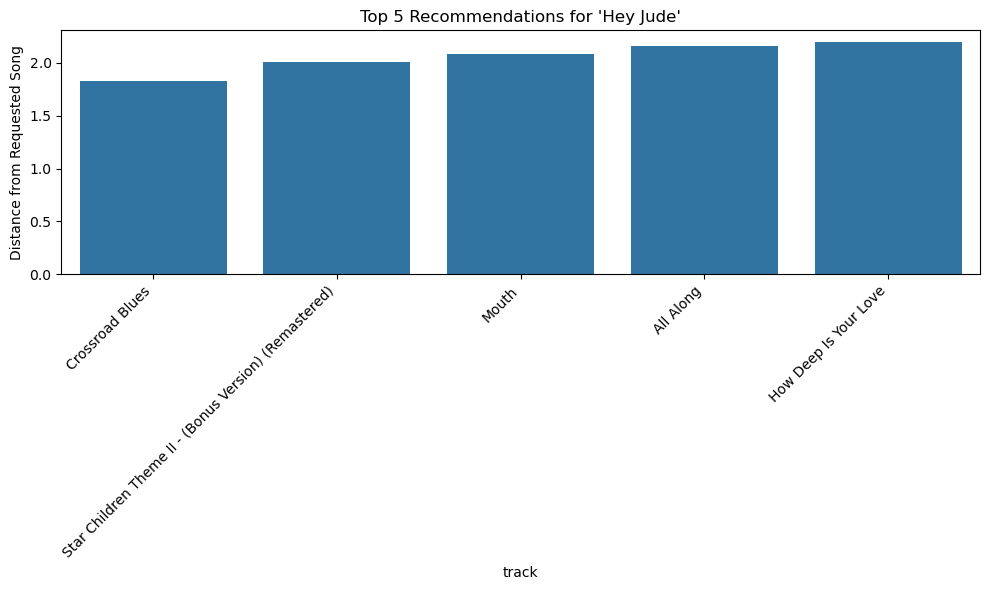

In [11]:
def recommend_songs(song_id, num_recommendations=5):
    try:
        # Find the index of the requested song
        song_index = songs_df[songs_df['track'] == song_id].index[0]

        # Get the features for the requested song
        song_features = X_scaled[song_index].reshape(1,-1)

        # Find the nearest neighbors
        distances, indices = model.kneighbors(song_features)

        # Exclude the song itself
        recommended_indices = indices.flatten()[1:]

        # Create a bar plot of the song distances
        recommended_distances = distances.flatten()[1:num_recommendations+1]
        recommended_songs = songs_df.iloc[recommended_indices[:num_recommendations]]

        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        sns.barplot(x=recommended_songs['track'], y=recommended_distances)
        plt.title(f"Top {num_recommendations} Recommendations for '{song_id}'")
        plt.ylabel('Distance from Requested Song')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    except IndexError:
        print(f"Error: Song '{song_id}' not found in the dataset.")

# Example usage
recommend_songs('Hey Jude', num_recommendations=5)

1. Distribution of Key Features
We can create histograms of various features to get an idea of how each feature is distributed across the dataset.

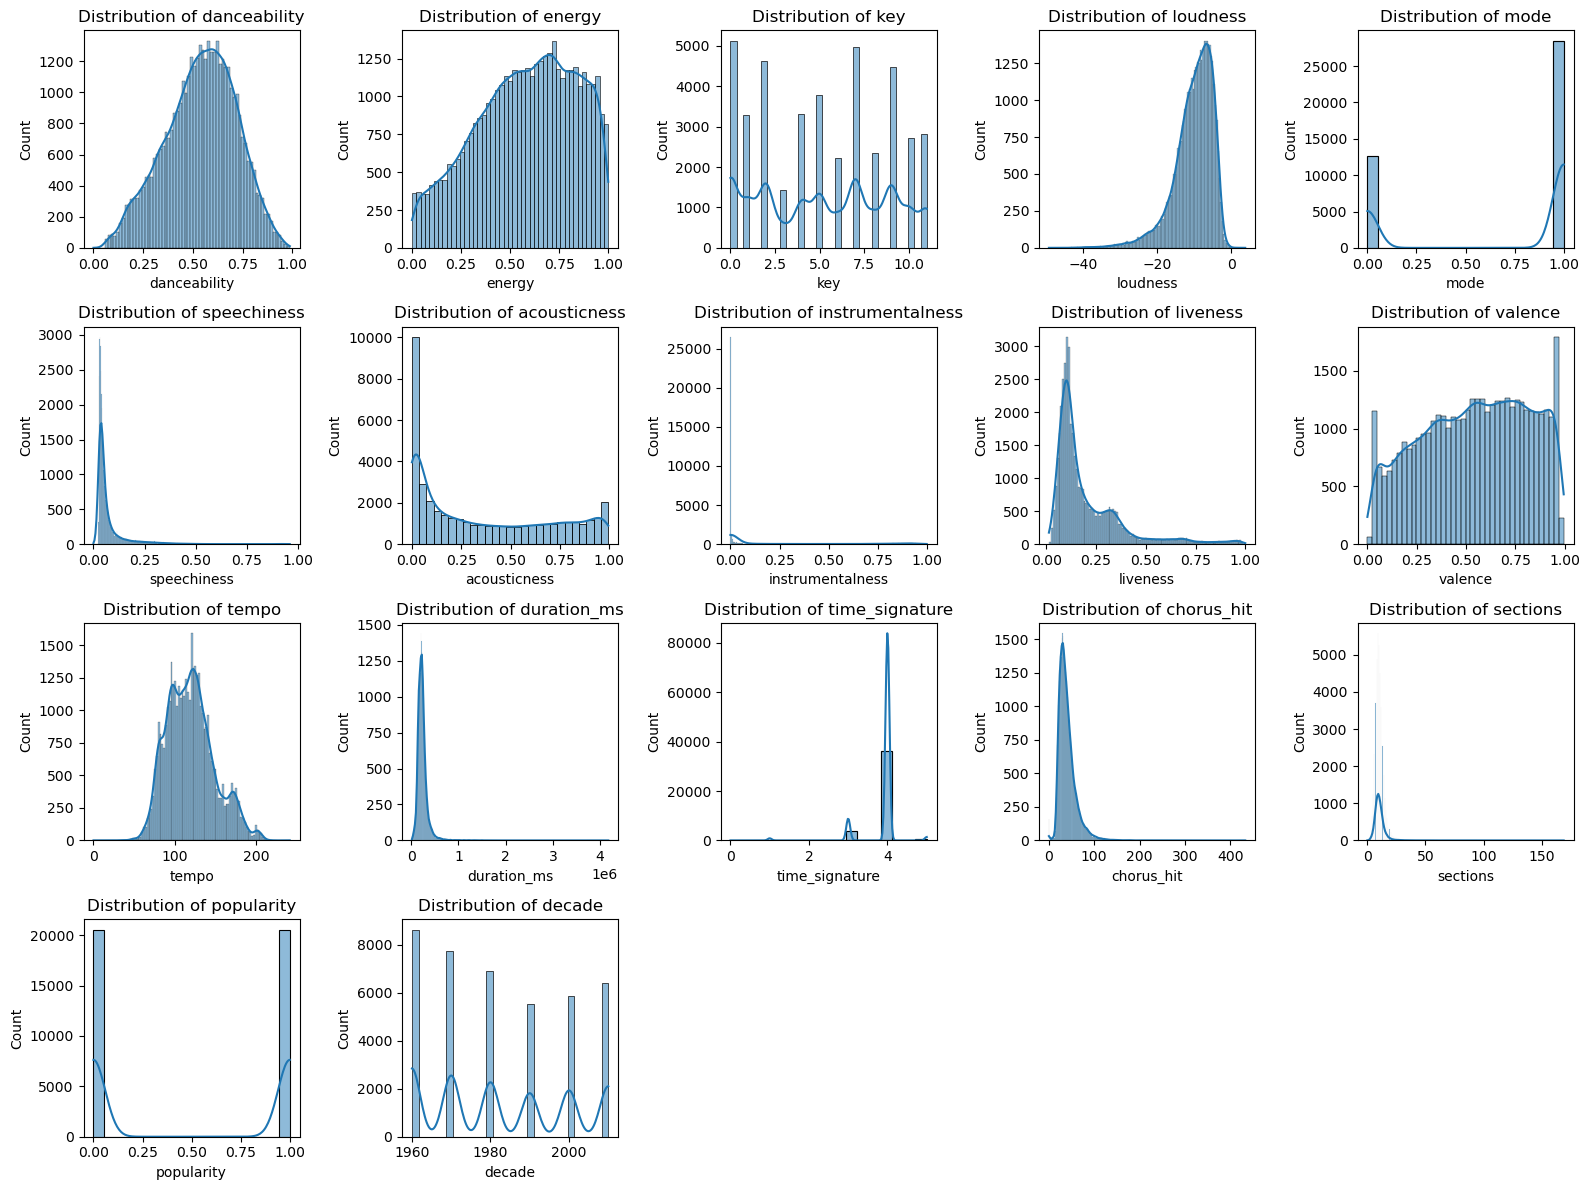

In [12]:
# List of features you want to analyze
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'popularity', 'decade']

# Set the size of the figure
plt.figure(figsize=(16, 12))

# Create subplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(4, 5, i)  # 4 rows, 5 columns
    sns.histplot(songs_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

2. Correlation Matrix Heatmap
This will help identify any strong correlations between features, which could be useful for understanding the relationships between them or for feature selection.

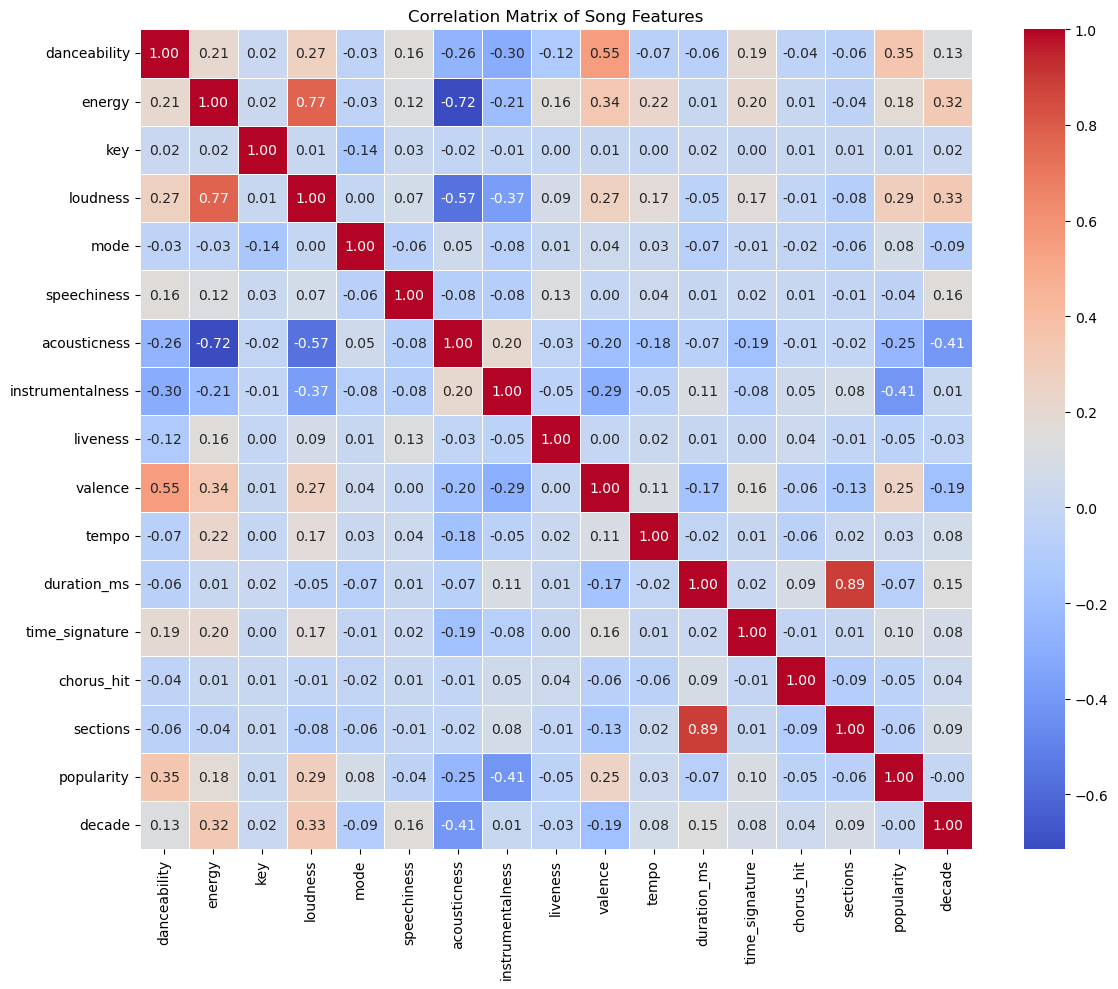

In [13]:
# Calculate the correlation matrix
corr_matrix = songs_df[features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Song Features")
plt.tight_layout()
plt.show()

Code to Get and Plot the Top 10 Most Popular Songs: